# MNIST Handwritten Digit Classification using ANN

### About the Dataset

Welcome to the Hello World of the World of Deep Learning.

The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

## 1. Importing packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

## 2. Downloading Dataset and applying Transformations.

In [2]:
# defining the transformations (converting the image into tensors).
transform = transforms.Compose([transforms.ToTensor()])

The Dataset could have been normalised, but as all the pixel values(features) range from 0 to 255, normalising the data doesn't seem necessary.

In [3]:
# trainset and testset
train_set = datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
    transform = transform
)

test_set = datasets.MNIST(
    root = './data/MNIST',
    train = False,
    download = True,
    transform = transform
)

In [5]:
print(f'Train set : {len(train_set)}')
print(f'Test set : {len(test_set)}')

Train set : 60000
Test set : 10000


## 3. Exploring the data

In [4]:
from torch.utils.data import DataLoader
# Loading data into a DataLoader of batch size 64
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

In [5]:
# Unpacking the images and labels of a batch
images, labels = next(iter(train_loader))

Let's check the shapes of our images and labels.

In [6]:
print("Images' Shape : ", images.shape)
print("Labels' Shape : ", labels.shape)

Images' Shape :  torch.Size([64, 1, 28, 28])
Labels' Shape :  torch.Size([64])


The shape of the `images` tensor denotes the no of training examples in the batch, the no of color channels in the batch, and finally the height and width of every image.

The shape of the `labels` tensor is 64, as the labels contains the digit(ground-truth) for every single image in the dataset.

Let's now see how the images look like along with their truth labels.

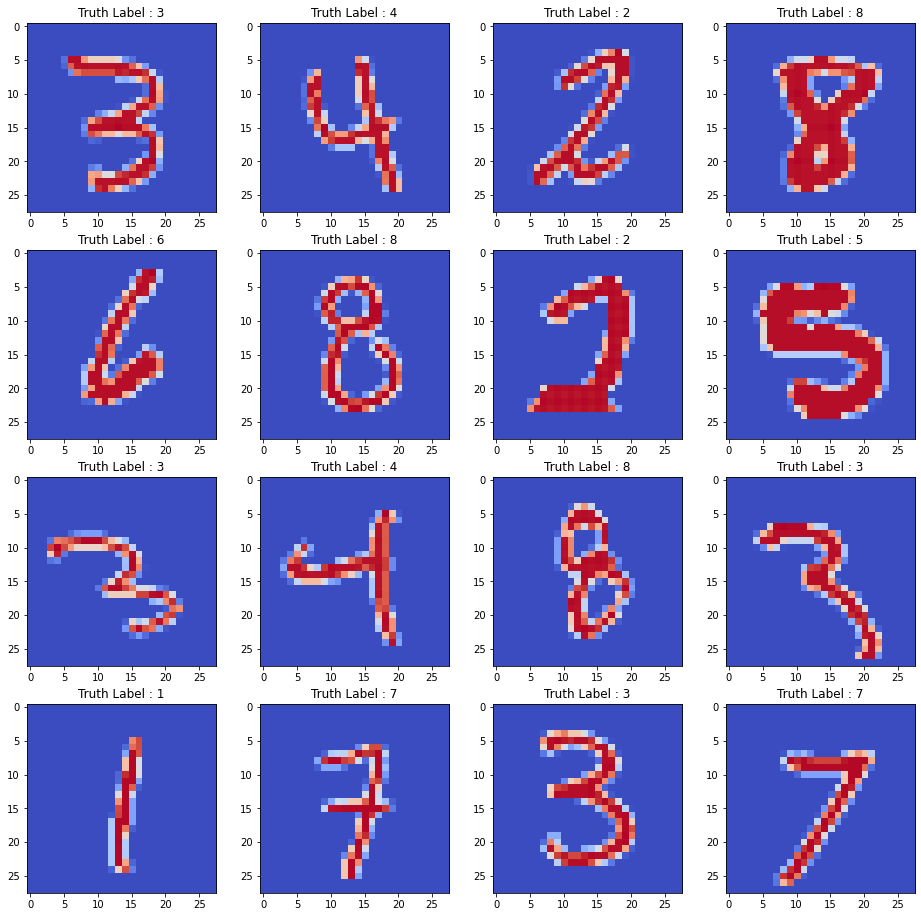

In [7]:
from IPython.core.pylabtools import figsize
# creating subplots 4x4 grid
fig, ax = plt.subplots(4,4, figsize=(16,16))

index = 0
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(images[index].squeeze(), cmap='coolwarm')
        ax[i,j].set_title(f'Truth Label : {labels[index].item()}')
        index+=1

## 4. Designing the Neural Network

The input layer consists of 28x28 neurons(= the no of pixels in each image) and the output layer consistes of 10 neurons(= no of classes). The Neural Network also consists of 2 hidden layer with 128 and 64 neurons respectively.

In [8]:
# no of neurons in respective layers
input_sizes = 28*28
output_sizes = 10
hidden_sizes = [128, 64]

In [9]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        
        self.linear1 = nn.Linear(in_features=input_sizes, out_features=hidden_sizes[0])       # 784 -> 128
        self.linear2 = nn.Linear(in_features=hidden_sizes[0], out_features=hidden_sizes[1])   # 128 -> 64
        self.out = nn.Linear(in_features=hidden_sizes[1], out_features=output_sizes)          # 64  -> 10
        
    def forward(self, t):
         # (1) input layer
        t = t 
        
        # (2) hidden layer 1
        t = self.linear1(t)
        t = F.relu(t)
        
        # (3) hidden layer 2
        t = self.linear2(t)
        t = F.relu(t)
        
        # (4) output layer
        t = self.out(t)
        
        return t

In [10]:
network_trial = ANN()

In [11]:
print(network_trial)

ANN(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


Inside the network we usually use `relu()` as our non-linear activation function, but for the output layer, whenever we have a single category that we are trying to predict, we use `softmax()`. The softmax function returns a positive probability for each of the prediction classes, and the probabilities sum to 1.
However, in our case, we won't use `softmax()` because the loss function that we'll use, `nn.CrossEntropyLoss()`, implicitly performs the `softmax()` operation on its input, so we'll just return the result of the last linear transformation.

## 5. The Training Process

In [ ]:
# enabling Gradients for optimization
torch.set_grad_enabled(True)

In [12]:
def get_num_correct(pred, labels):
    '''Returns number of labels predicted corrected'''
    return pred.argmax(dim=1).eq(labels).sum().item()

Getting ready for the training process, selecting `hyperparameters`, `loss function` and `optimizer`. 

In [13]:
network = ANN()

# Hyperparameters
lr = 0.001
epochs = 20
batch_size = 64
shuffle = True

# selecting the loss function
criterion = nn.CrossEntropyLoss()

# selecting the optimizer for the loss function
optimizer = optim.Adam(network.parameters(), lr=lr)

# using the dataloader to load batches of data
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=shuffle)

#### The Training Loop

The images have to be flattened out before feeding it to the ANN. Then, the batch is fed into the network. The outputs of the network is fed into the loss function with the truth labels. Then, the gradients are forces to 0 and backprop starts. The optimizer Adam steps closer in the direction of the local minima of the loss function.

In [14]:
for epoch in range(epochs):
    total_loss=0
    total_correct=0
    for images, labels in train_loader:
        # flattening the 3d image into a 1d vector
        images = images.view(images.shape[0], -1)
        
        # Forward Prop
        outputs = network(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad() # making previous grads 0
        loss.backward() # Calculate Gradients / Back Prop
        optimizer.step() # Update Weights
        
        total_loss += loss.item() # total loss over batches
        # the total loss has to be divided by `len(batches)` for the correct value
        total_correct += get_num_correct(outputs, labels)
    
    print(f'Epoch {epoch} - Training Loss : {total_loss/len(train_loader)}, Accuracy : {total_correct / len(train_set)}')

Epoch 0 - Training Loss : 0.33577331207962685, Accuracy : 0.9050333333333334
Epoch 1 - Training Loss : 0.1362605352502769, Accuracy : 0.9592666666666667
Epoch 2 - Training Loss : 0.09377730531600127, Accuracy : 0.9716333333333333
Epoch 3 - Training Loss : 0.06793924443213258, Accuracy : 0.9782833333333333
Epoch 4 - Training Loss : 0.05318567027419265, Accuracy : 0.9833333333333333
Epoch 5 - Training Loss : 0.04209359425694934, Accuracy : 0.9862166666666666
Epoch 6 - Training Loss : 0.0345523768466518, Accuracy : 0.9890333333333333
Epoch 7 - Training Loss : 0.027477983807640296, Accuracy : 0.9914166666666666
Epoch 8 - Training Loss : 0.02278933758504375, Accuracy : 0.9926333333333334
Epoch 9 - Training Loss : 0.018656121245624786, Accuracy : 0.994
Epoch 10 - Training Loss : 0.018356970673022572, Accuracy : 0.9937833333333334
Epoch 11 - Training Loss : 0.014139925160599542, Accuracy : 0.9954833333333334
Epoch 12 - Training Loss : 0.012824824781461984, Accuracy : 0.9956833333333334
Epoch 

The training accuracy of the model in `20 epochs` is already `99 %`. The model seems to good to be true and probably, overfitting the training data.

## 6. Evaluating the network

Using the test_loader to generate batches of test data and test the `Model` with it.

In [15]:
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

In [16]:
correct_count = 0

for images, labels in test_loader:
    for i in range(len(labels)):
        # getting individual images in the particular test loader and flattening it
        image = images[i].view(1, 784)
        # turning off gradients to save computation
        with torch.no_grad():
            outputs = network(image)
        # squeezing the dimension of the output tensor from [[]] to []
        outputs = list(outputs.squeeze())
        # taking agrmax of the output and setting it as the predicted label
        pred_label = outputs.index(max(outputs))
        true_label = labels[i]
        
        if(true_label == pred_label):
            correct_count += 1
        
print("Test Accuracy =", (correct_count/len(test_set)))

Test Accuracy = 0.979


Well, the test accuracy also came out to be really good at about `97 %`. Looks like our ANN have generalised quite well to the training set.

So, we have come to the end of it. 

## References

- Medium Article : [Handwritten Digit Recognition Using PyTorch - Intro To Neural Networks](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
- YouTube : [deeplizard](https://www.youtube.com/watch?v=v5cngxo4mIg&list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG)

# The End